# Test

In [2]:
import pandas as pd

path = "/work/FAC/FGSE/IDYST/tbeucler/default/milton/repos/alpha_bench/tracks/ibtracs/"
df = pd.read_csv(path + 'ibtracs.ALL.list.v04r00.csv', dtype="string")
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,,Year,,,,,,,degrees_north,degrees_east,...,second,kts,second,ft,nmile,nmile,nmile,nmile,kts,degrees
1,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 03:00:00,NR,10.9000,80.3000,...,,,,,,,,,9,266
2,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 06:00:00,NR,10.8709,79.8265,...,,,,,,,,,9,267
3,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 09:00:00,NR,10.8431,79.3524,...,,,,,,,,,9,267
4,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 12:00:00,NR,10.8188,78.8772,...,,,,,,,,,9,267


In [5]:
print(df[df["ISO_TIME"]=="2019-11-22 00:00:00"][["ISO_TIME", "SEASON", "NAME", "LAT", "LON"]])

                   ISO_TIME SEASON       NAME       LAT       LON
692381  2019-11-22 00:00:00   2019   KALMAEGI   11.3200   114.000
692482  2019-11-22 00:00:00   2019  FUNG-WONG   22.9750   124.875
692529  2019-11-22 00:00:00   2019  SEBASTIEN   24.2000  -58.8000
692574  2019-11-22 00:00:00   2020       RITA  -7.50000   163.000


In [2]:
import xarray as xr
import cartopy.crs as ccrs
import scripts.utils as ut
import numpy as np
import scripts.plotting as sp
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.pyplot as plt

path = "/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ECMWF/ERA5/mslp/mslp_2019.nc"
path1 = "/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ECMWF/ERA5/uwnd/uwnd_2019.nc"
path2 = "/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ECMWF/ERA5/vwnd/vwnd_2019.nc"
ds = xr.open_dataset(path)
ds1 = xr.open_dataset(path1)
ds2 = xr.open_dataset(path2)

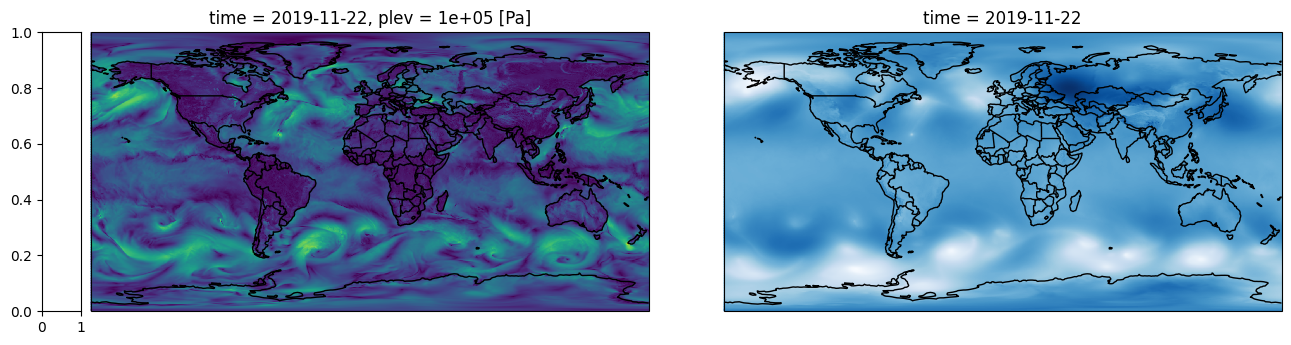

In [9]:
day = "20191122"
nc_time = ut.date_time_nn_to_netcdf(day, str(0))
ds3 = np.sqrt(ds1.sel(time=nc_time, plev=1e5)["var131"]**2+ds2.sel(time=nc_time, plev=1e5)["var132"]**2)
ds4 = ds.sel(time=nc_time)["var151"]
axes_class = (GeoAxes,dict(projection=ccrs.PlateCarree()))
fig=plt.figure(figsize=(16,8), facecolor='white')
grid = AxesGrid(fig, 111, axes_class=axes_class,
            nrows_ncols=(1,2),
            axes_pad=(0.75, 0.25),
            cbar_pad=0.1,
            cbar_location="left",
            cbar_mode="edge",
            cbar_size="7%",
            label_mode='L')
ax = sp.project(-90, 90, 0, 359.8, ax=grid[0])
ax.set_title("")
ax.add_feature(cfeature.COASTLINE.with_scale('110m')) # adding coastline
ax.add_feature(cfeature.BORDERS.with_scale('110m')) # adding borders
im = ds3.plot(transform=ccrs.PlateCarree(), cmap="viridis", add_colorbar=False, alpha=1, ax=ax)

ax2 = sp.project(-90, 90, 0, 359.8, ax=grid[1])
ax2.set_title("")
ax2.add_feature(cfeature.COASTLINE.with_scale('110m')) # adding coastline
ax2.add_feature(cfeature.BORDERS.with_scale('110m')) # adding borders
im2 = ds4.plot(transform=ccrs.PlateCarree(), cmap="Blues", add_colorbar=False, alpha=1, ax=ax2)
fig.canvas.draw()
fig.savefig(f"../plots/era5_{day}_0h.png", dpi=800, bbox_inches="tight")

In [16]:
print(ds3)

<xarray.DataArray (lat: 721, lon: 1440)>
array([[2.6648329e-04, 2.6648329e-04, 2.6648329e-04, ..., 2.6648329e-04,
        2.6648329e-04, 2.6648329e-04],
       [4.4663863e+00, 4.4684482e+00, 4.4701414e+00, ..., 4.4590836e+00,
        4.4612560e+00, 4.4631252e+00],
       [4.1840205e+00, 4.1870475e+00, 4.1910691e+00, ..., 4.1737843e+00,
        4.1764941e+00, 4.1802058e+00],
       ...,
       [4.8610735e+00, 4.8616900e+00, 4.8615456e+00, ..., 4.8594317e+00,
        4.8601594e+00, 4.8605633e+00],
       [4.3696156e+00, 4.3706465e+00, 4.3704376e+00, ..., 4.3694229e+00,
        4.3696752e+00, 4.3700204e+00],
       [2.6648329e-04, 2.6648329e-04, 2.6648329e-04, ..., 2.6648329e-04,
        2.6648329e-04, 2.6648329e-04]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2019-11-22
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
    plev     float64 1e+05


# Taking the first TC of 1019

In [2]:
%load_ext autoreload
%autoreload 2
import scripts.utils as ut
import pandas as pd
import numpy as np

path = "/work/FAC/FGSE/IDYST/tbeucler/default/milton/repos/alpha_bench/tracks/ibtracs/"
df = pd.read_csv(path + 'ibtracs.ALL.list.v04r00.csv', dtype="string")
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
0,,Year,,,,,,,degrees_north,degrees_east,...,second,kts,second,ft,nmile,nmile,nmile,nmile,kts,degrees
1,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 03:00:00,NR,10.9000,80.3000,...,,,,,,,,,9,266
2,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 06:00:00,NR,10.8709,79.8265,...,,,,,,,,,9,267
3,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 09:00:00,NR,10.8431,79.3524,...,,,,,,,,,9,267
4,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 12:00:00,NR,10.8188,78.8772,...,,,,,,,,,9,267


In [12]:
seasons = ["2019", "2020", "2021", "2022", "2023"]
for season in seasons:
    ut.write_input_params_to_file("./", df, TC_year=None, TC_id=None, season=season, multiple_6=True, debug=False)

TC id: 2018256S07076 (2019)
TC id: 2019326S08163 (2020)
TC id: 2020317S04092 (2021)
TC id: 2021323S10103 (2022)
TC id: 2022210S11095 (2023)


In [27]:
for season in seasons:
    print(df[df["SEASON"]==season][["SID","NAME"]].head(n=1), "\n")

                  SID       NAME
683876  2018256S07076  NOT_NAMED 

                  SID  NAME
692574  2019326S08163  RITA 

                  SID    NAME
698814  2020317S04092  ALICIA 

                  SID   NAME
705647  2021323S10103  PADDY 

                  SID       NAME
708121  2022210S11095  NOT_NAMED 



## Distance calculator

In [24]:
step = 6 # one week
max_dist = ut.max_historical_distance_within_step(df, step)

1/5975
597/5975
1194/5975
1791/5975
2388/5975
2985/5975
3582/5975
4179/5975
4776/5975
5373/5975
5970/5975
Max dist: 645.3430433993034km (TC 2013167N12128, idx [54, 649123]).


1160.8241250016658 711.5864254399107


Text(0.5, 1.0, 'Distribution of distances traveled by TCs during a week\nMax: 6134.251 km, Mean: 1160.824 km, Std: 711.586 km')

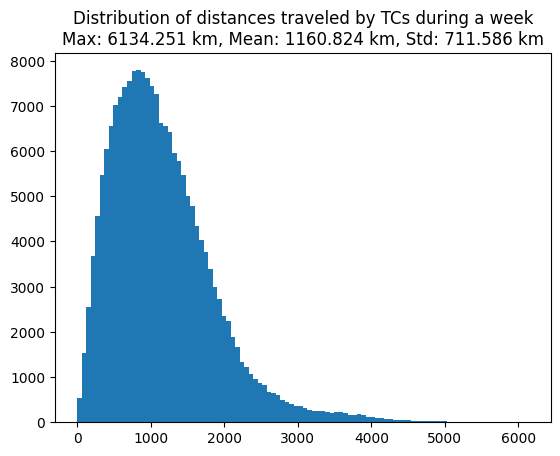

In [22]:
import numpy as np
import matplotlib.pyplot as plt
"""
d6 = np.load("./6h_dists.npy")
print(np.mean(d), np.std(d))
print([np.count_nonzero(d>dmax) for dmax in [400, 600, 800, 1000, 1200, 1400]])
plt.figure()
_, _, _ = plt.hist(d[d>400], bins=100)
"""	
d168 = np.load("./168h_dists.npy")
print(np.mean(d168), np.std(d168))
plt.figure()
_, _, _ = plt.hist(d168, bins=100)
plt.title("Distribution of distances traveled by TCs during a week"+f"\nMax: {np.max(d168):.3f} km, Mean: {np.mean(d168):.3f} km, Std: {np.std(d168):.3f} km")

Text(0.5, 1.0, 'Max dist: 6613.037 km,\n Mean: 897.536 km, Std: 695.732 km')

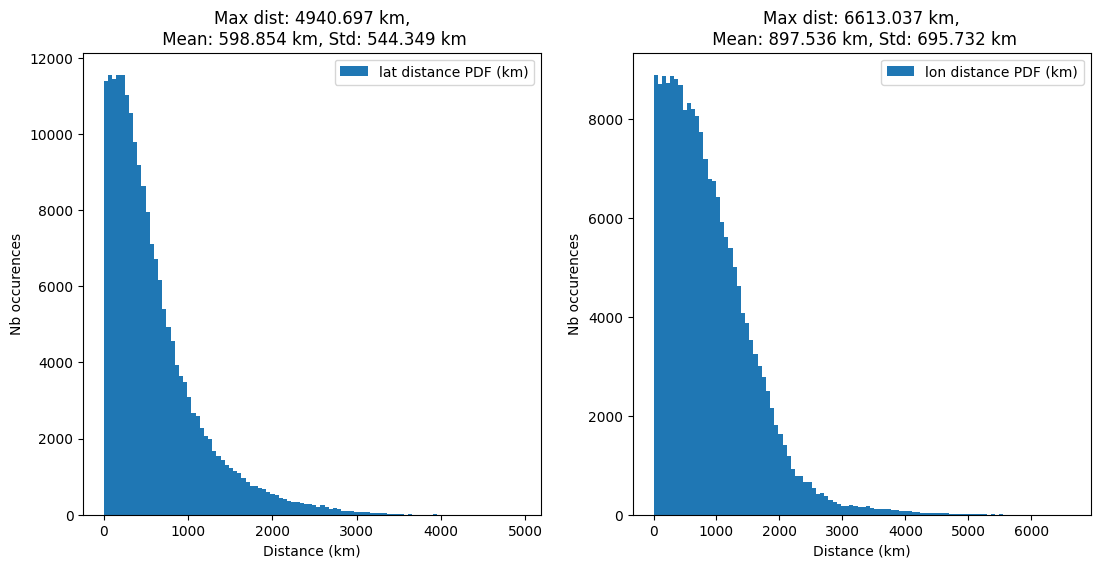

In [23]:
d168_lat = np.load("./168h_dists_lats.npy")
d168_lon = np.load("./168h_dists_lons.npy")

fig, axs = plt.subplots(1, 2, figsize=(13, 6))
ax1, ax2 = axs
ax1.hist(d168_lat, bins=100, label="lat distance PDF (km)")
ax1.set_title(f"Max dist: {d168_lat.max():.3f} km,\n Mean: {np.mean(d168_lat):.3f} km, Std: {np.std(d168_lat):.3f} km")
ax1.set_xlabel("Distance (km)")
ax1.set_ylabel("Nb occurences")
ax1.legend()

ax2.hist(d168_lon, bins=100, label="lon distance PDF (km)")
ax2.set_xlabel("Distance (km)")
ax2.set_ylabel("Nb occurences")
ax2.legend()
ax2.set_title(f"Max dist: {d168_lon.max():.3f} km,\n Mean: {np.mean(d168_lon):.3f} km, Std: {np.std(d168_lon):.3f} km")

## combine

In [ ]:
ut.combine_and_convert_gribs("/scratch/lpoulain/panguweather/")

In [1]:
import xarray as xr
ds = xr.load_dataset("/scratch/lpoulain/panguweather/pangu_d_20180913_t_0600_lt_6-162h.nc")
ds

<xarray.Dataset>
Dimensions:            (time: 27, isobaricInhPa: 13, latitude: 721,
                        longitude: 1440)
Coordinates:
  * time               (time) datetime64[ns] 2018-09-13T06:00:00 ... 2018-09-...
    step               (time) timedelta64[ns] 0 days 06:00:00 ... 6 days 18:0...
  * isobaricInhPa      (isobaricInhPa) float64 1e+03 925.0 850.0 ... 100.0 50.0
  * latitude           (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude          (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
    valid_time         (time) datetime64[ns] 2018-09-13T12:00:00 ... 2018-09-20
    meanSea            float64 0.0
    heightAboveGround  float64 10.0
Data variables:
    z                  (time, isobaricInhPa, latitude, longitude) float32 1.4...
    q                  (time, isobaricInhPa, latitude, longitude) float32 0.0...
    t                  (time, isobaricInhPa, latitude, longitude) float32 267...
    u                  (time, isobaricInhPa, latitude, longitude) float32 -4....
    v                  (time, isobaricInhPa, latitude, longitude) float32 -2....
    msl                (time, latitude, longitude) float32 1.019e+05 ... 1.01...
    u10                (time, latitude, longitude) float32 -2.602 ... -0.6205
    v10                (time, latitude, longitude) float32 -2.129 ... -0.6102
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-10-18T14:22 GRIB to CDM+CF via cfgrib-0.9.1...

In [2]:
import numpy as np
arr = np.array([[1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12]])
arr ** 2

array([[  1,   4,   9,  16,  25,  36],
       [ 49,  64,  81, 100, 121, 144]])

In [9]:
import numpy as np
dt = np.datetime64("2019-01-01T00:00:00",'ns')
print(dt)
date, time = "20190101", "0000"
out = date[:4] + "-" + date[4:6] + "-" + date[6:]
out += "T" + time[:2] + ":" + time[2:] + ":00.000000000"
print(out)
print(out==dt)
out = np.datetime64(out)
print(out)
print(out==dt)

2019-01-01T00:00:00.000000000
2019-01-01T00:00:00.000000000
False
2019-01-01T00:00:00.000000000
True


In [20]:
import xarray as xr
path = "/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ECMWF/ERA5/uwind/"
path_gcast = "/scratch/lpoulain/panguweather/pangu_d_20191122_t_0000_6h.grib"
ds = xr.open_dataset(path+"uwnd_2019.nc", engine="netcdf4")
ds2 = xr.open_dataset(path_gcast, engine="cfgrib")
ds, ds2

Ignoring index file '/scratch/lpoulain/panguweather/pangu_d_20191122_t_0000_6h.grib.923a8.idx' incompatible with GRIB file
skipping variable: paramId==167 shortName='t2m'
Traceback (most recent call last):
  File "/users/lpoulain/louis/ecmwf_venv/lib/python3.10/site-packages/cfgrib/dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/users/lpoulain/louis/ecmwf_venv/lib/python3.10/site-packages/cfgrib/dataset.py", line 611, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=10.0) new_value=Variable(dimensions=(), data=2.0)


(<xarray.Dataset>
 Dimensions:  (time: 2920, lon: 1440, lat: 721, plev: 21)
 Coordinates:
   * time     (time) datetime64[ns] 2019-01-01 ... 2019-12-31T21:00:00
   * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
   * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
   * plev     (plev) float64 1e+03 2e+03 3e+03 5e+03 ... 9.5e+04 9.75e+04 1e+05
 Data variables:
     var131   (time, plev, lat, lon) float32 ...
 Attributes:
     CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
     Conventions:  CF-1.6
     institution:  European Centre for Medium-Range Weather Forecasts
     history:      Fri Sep 03 06:59:54 2021: cdo -f nc copy uwind_2019.grib .....
     CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...,
 <xarray.Dataset>
 Dimensions:            (isobaricInhPa: 13, latitude: 721, longitude: 1440)
 Coordinates:
     time               datetime64[ns] ...
     step               time

In [21]:
ds1 = ds.sel(time=out, plev=1e5)
ds3 = ds2.sel(isobaricInhPa=1e3)
ds1, ds3

(<xarray.Dataset>
 Dimensions:  (lon: 1440, lat: 721)
 Coordinates:
     time     datetime64[ns] 2019-01-01
   * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
   * lat      (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
     plev     float64 1e+05
 Data variables:
     var131   (lat, lon) float32 ...
 Attributes:
     CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
     Conventions:  CF-1.6
     institution:  European Centre for Medium-Range Weather Forecasts
     history:      Fri Sep 03 06:59:54 2021: cdo -f nc copy uwind_2019.grib .....
     CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...,
 <xarray.Dataset>
 Dimensions:            (latitude: 721, longitude: 1440)
 Coordinates:
     time               datetime64[ns] ...
     step               timedelta64[ns] ...
     isobaricInhPa      float64 1e+03
   * latitude           (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0


In [22]:
type(np.sqrt(ds3["u"]**2+ds3["v"]**2))

xarray.core.dataarray.DataArray

In [22]:
from scripts import utils as ut
import xarray as xr
import pandas as pd
%load_ext autoreload
%autoreload 2

ds_path = "/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/panguweather/pangu_d_20191122_t_0000_6h.grib"
path = "/work/FAC/FGSE/IDYST/tbeucler/default/milton/repos/alpha_bench/tracks/ibtracs/"
ibtracs_df = pd.read_csv(path + 'ibtracs.ALL.list.v04r00.csv', dtype="string").loc[1:]
ds = xr.open_dataset(ds_path, engine="cfgrib")
tc_id = "2019326S08163"
ibtracs_df.head()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Ignoring index file '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/panguweather/pangu_d_20191122_t_0000_6h.grib.923a8.idx' incompatible with GRIB file
skipping variable: paramId==167 shortName='t2m'
Traceback (most recent call last):
  File "/users/lpoulain/louis/ecmwf_venv/lib/python3.10/site-packages/cfgrib/dataset.py", line 680, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/users/lpoulain/louis/ecmwf_venv/lib/python3.10/site-packages/cfgrib/dataset.py", line 611, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=10.0) new_value=Variable(dimensions=(), data=2.0)


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
1,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 03:00:00,NR,10.9000,80.3000,...,,,,,,,,,9,266
2,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 06:00:00,NR,10.8709,79.8265,...,,,,,,,,,9,267
3,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 09:00:00,NR,10.8431,79.3524,...,,,,,,,,,9,267
4,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 12:00:00,NR,10.8188,78.8772,...,,,,,,,,,9,267
5,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 15:00:00,NR,10.8000,78.4000,...,,,,,,,,,9,268


In [31]:
ut.cut_rectangle(ds=ds, df_tracks=ibtracs_df, tc_id=tc_id)

(721, 1440)
(-7.7, 163.9)
(1, 721, 1440)
<xarray.Dataset>
Dimensions:            (isobaricInhPa: 13, latitude: 721, longitude: 1440)
Coordinates:
    time               datetime64[ns] 2019-11-22
    step               timedelta64[ns] 06:00:00
  * isobaricInhPa      (isobaricInhPa) float64 1e+03 925.0 850.0 ... 100.0 50.0
  * latitude           (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude          (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
    valid_time         datetime64[ns] ...
    meanSea            float64 ...
    heightAboveGround  float64 ...
Data variables:
    z                  (isobaricInhPa, latitude, longitude) float32 nan ... nan
    q                  (isobaricInhPa, latitude, longitude) float32 nan ... nan
    t                  (isobaricInhPa, latitude, longitude) float32 nan ... nan
    u                  (isobaricInhPa, latitude, longitude) float32 nan ... nan
    v                  (isobaricInhPa, latitude, longitude) float32 na

ValueError: ValueError

In [2]:
from scripts import utils as ut
import pandas as pd
%load_ext autoreload
%autoreload 2

ds_path = "/scratch/lpoulain/panguweather/pangu_d_20180913_t_0600_lt_6-144h.nc"
path = "/work/FAC/FGSE/IDYST/tbeucler/default/milton/repos/alpha_bench/tracks/ibtracs/"
ibtracs_df = pd.read_csv(path + 'ibtracs.ALL.list.v04r00.csv', dtype="string")

tc_id = "2018256S07076"

In [ ]:
ut.cut_and_save_rect(ds_path=ds_path, ibtracs_df=ibtracs_df, tc_id=tc_id, output_path="/scratch/lpoulain/panguweather/test_rect.nc")

In [6]:
import glob
import os
import xarray as xr
def remove_unwanted(ds):
    ds_new = ds.head(ds["time"].values.shape[0]-3)
    return ds_new
path = "/scratch/lpoulain/panguweather/"
filelist = glob.glob(path + "*.nc")
for file in filelist:
    l = len(file.split("-")[-1])
    ds = xr.load_dataset(path + file)
    ds_new = ut.cut_and_save_rect
    ds_new.to_netcdf(file[:-l]+str(int(file[-l:-4])-18) + "h.nc")
    os.remove(path + file)